# A review of important concepts in numerical optimization
## By Qijun Jin and Johnny

In [166]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sympy import symbols, solve
from numpy import linalg as LA
import numpy as np
import pandas as pd
import random

if __name__ == '__main__':
    from IPython.display import display
    
    %matplotlib inline

# 1. One dimensional case

$
f(x) = x^3 - 2x+ 2
$

Solutions:  [-sqrt(6)/3, sqrt(6)/3]


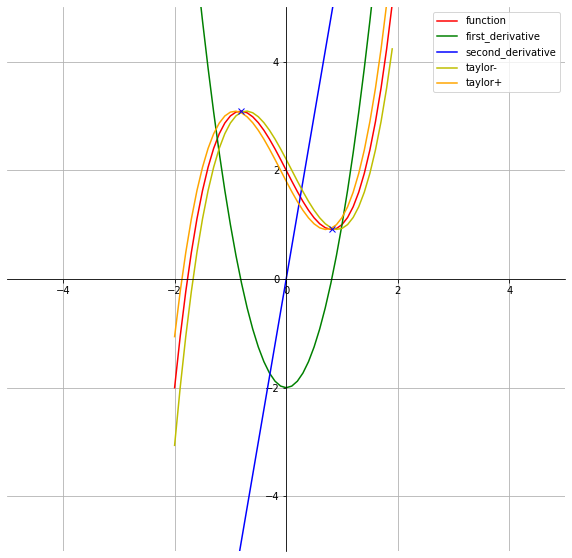

In [167]:
# Functions

def function(x):
    return x**3 - 2*x + 2

def first_derivative(x):
    return 3*x**2 - 2

def second_derivative(x): 
    return 6*x

def taylor(x, d):
    return function(x) + d*first_derivative(x) + (1/2)*(d**2)*second_derivative(x)

# Solve equation

from sympy import symbols, solve

x = symbols('x')
x_sol = solve(first_derivative(x)) # Exercise 2

print('Solutions: ', sol)

# Plot

fig = plt.figure(figsize = [10,10])
  
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x = np.arange(-2, 2, 0.1) # Range

plt.plot(x, function(x), 'r', label = "function") # Exercise 1
plt.plot(x, first_derivative(x), 'g', label = "first_derivative") # Exercise 2
plt.plot(x, second_derivative(x), 'b', label = "second_derivative") # Exercise 4
plt.plot(x, taylor(x, -0.1), 'y', label = "taylor-") # Exercise 3
plt.plot(x, taylor(x, 0.1), 'orange', label = "taylor+") # Exercise 3
plt.plot(sol[0],function(sol[0]), marker = 'x', color = 'b') # Exercise 2
plt.plot(sol[1],function(sol[1]), marker = 'x', color = 'b') # Exercise 2
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.grid()
plt.legend()
plt.show()

### Exercise 1, 2

We found that the function has maximum and minimum at those points (blue marker) where its first derivatives are 0.

### Exercise 3, 4

In the range [-2, 0], the function is concave and there is a maximum as its sencond derivative is negative.

In the range [0, 2], the function is convex and there is a minimum as its sencond derivative is positive.

As we can see at the image, the taylor expansion gives us the an approximation to its original function around $x^*$.

# 2. Two dimensional case

## 2.1 A simple two-dimensional function

$
f(x) = x^2_1 + x^2_2
$

Taylor approximations around x = (0,0) with d = (+/-0.01): 
Taylor with (-0.01, -0.01):  0.0002
Taylor with (-0.01, 0.01):  0.0002
Taylor with (0.01, -0.01):  0.0002
Taylor with (0.01, 0.01):  0.0002
Function is convex(minimum):  True
Eigenvalues are: [2. 2.]
Eigenvalues are strictly positive:  True
Eigenvalues are strictly negative:  False
At point [0, 0] the gradient is zero


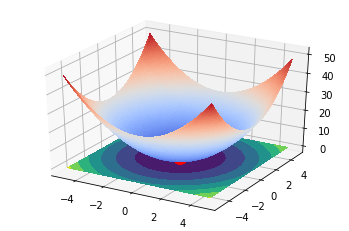

In [168]:
# Functions

def function(x):
    return x[0]**2 + x[1]**2

def first_derivative(x):
    return np.array([2*x[0], 2*x[1]])

def first_derivative_d(x, d): # With perturbation 
    return np.matmul(d.T, first_derivative(x))

def hessian_d(x, d, H = np.array([[2,0], [0,2]])):
    return np.matmul(np.matmul(d.T,H),d)

def taylor(x, d):
    value = 0
    value += function(x)
    value += first_derivative_d(x, d)
    value += (1/2) * hessian_d(x, d)
    return value

print('Taylor approximations around x = (0,0) with d = (+/-0.01): ')
print('Taylor with (-0.01, -0.01): ', taylor(np.array([0,0]), np.array([-0.01,-0.01]))) # Taylor approximation
print('Taylor with (-0.01, 0.01): ', taylor(np.array([0,0]), np.array([-0.01,0.01]))) # Taylor approximation
print('Taylor with (0.01, -0.01): ', taylor(np.array([0,0]), np.array([0.01,-0.01]))) # Taylor approximation
print('Taylor with (0.01, 0.01): ', taylor(np.array([0,0]), np.array([0.01,0.01]))) # Taylor approximation

def hessian_convex(x, d): # Exercise 3
    try:
      if d[0] != 0 and d[1]!= 0:
        return hessian_d(x, d) > 0
    except ValueError:
        return ValueError

print('Function is convex(minimum): ', hessian_convex(np.array([0,0]), np.array([0.01, 0.01])))

H = np.array([[2,0], [0,2]])
w, v = LA.eig((H))
print('Eigenvalues are:', w)

def strict_min():
    return np.all(w > 0)

print('Eigenvalues are strictly positive: ', strict_min())

def strict_max():
    return np.all(w < 0)

print('Eigenvalues are strictly negative: ', strict_max())

# Surface to plot
x0_range = np.arange(-5, 5, 0.1)
x1_range = np.arange(-5, 5, 0.1)
x0, x1 = np.meshgrid(x0_range, x1_range)
z = x0**2 + x1**2

# Surface plot 3D + contour plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x0, x1, z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.contourf(x0, x1, z, zdir='z',offset=0)

# Exercise 2: Gradient 

def first_derivative_partial(x): 
    return 2*x

# Solve equation

x0_s = symbols('x0')
x0_sol = solve(first_derivative_partial(x0_s))

x1_s = symbols('x1')
x1_sol = solve(first_derivative_partial(x1_s))

x = [x0_sol[0], x1_sol[0]]

if (np.any(w == 0)):
  print('There is no gradient')
else:
  print('At point', x, 'the gradient is zero')

ax.scatter(x, function(x), zdir='z', color = 'r', s = 200)

plt.show()

### Exercise 1
The function has its minimum at point (0, 0)

### Exercise 2
The gradient of the function is 0 at point (0, 0)

### Exercise 3
The function is convex at point (0,0)

Eigenvalues are: [-2. -2.]
Eigenvalues are strictly positive:  False
Eigenvalues are strictly negative:  True
At point [0, 0] the gradient is zero


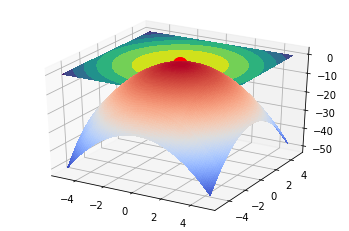

In [169]:
def function(x):
  return -x[0]**2 - x[1]**2

H = np.array([[-2,0], [0,-2]])
w, v = LA.eig((H))
print('Eigenvalues are:', w)

def strict_min():
    return np.all(w > 0)

print('Eigenvalues are strictly positive: ', strict_min())

def strict_max():
    return np.all(w < 0)

print('Eigenvalues are strictly negative: ', strict_max())

# Surface to plot
x0_range = np.arange(-5, 5, 0.1)
x1_range = np.arange(-5, 5, 0.1)
x0, x1 = np.meshgrid(x0_range, x1_range)
z = -x0**2 + -x1**2

# Surface plot 3D + contour plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x0, x1, z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.contourf(x0, x1, z, zdir='z',offset=0)

# Gradient
def first_derivative_partial(x): 
    return -2*x

# Solve equation

x0_s = symbols('x0')
x0_sol = solve(first_derivative_partial(x0_s))

x1_s = symbols('x1')
x1_sol = solve(first_derivative_partial(x1_s))

x = [x0_sol[0], x1_sol[0]]

if (np.any(w == 0)):
  print('There is no gradient')
else:
  print('At point', x, 'the gradient is zero')

ax.scatter(x, function(x), zdir='z', color = 'r', s = 200)

plt.show()

Eigenvalues are:  [ 2. -2.]
Eigenvalues are strictly positive:  False
Eigenvalues are strictly negative:  False
At point [0, 0] the gradient is zero


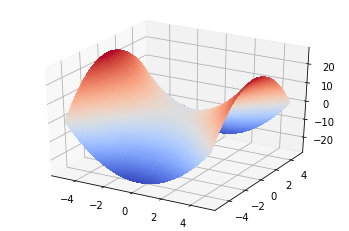

In [170]:
def function(x):
  return x[0]**2 - x[1]**2

def first_derivative(x):
  return 2*x[0] - 2*x[1]

H = np.array([[2,0], [0,-2]])
w, v = LA.eig((H))
print('Eigenvalues are: ', w)

def strict_min():
    return np.all(w > 0)

print('Eigenvalues are strictly positive: ', strict_min())

def strict_max():
    return np.all(w < 0)

print('Eigenvalues are strictly negative: ', strict_max())

# Surface to plot
x0 = np.arange(-5, 5, 0.1)
x1 = np.arange(-5, 5, 0.1)
x1_value, x2_value = np.meshgrid(x0, x1)
z_value = x1_value**2 - x2_value**2

# Surface plot 3D + contour plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x1_value, x2_value, z_value, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

# Gradient
def first_derivative_partial(x): 
    return 2*x

def first_derivative_partial_2(x): 
    return -2*x

x0_s = symbols('x0')
x0_sol = solve(first_derivative_partial(x0_s))

x1_s = symbols('x1')
x1_sol = solve(first_derivative_partial_2(x1_s))

x = [x0_sol[0], x1_sol[0]]

if (np.any(w == 0)):
  print('There is no gradient')
else:
  print('At point', x, 'the gradient is zero')

ax.scatter(x, function(x), zdir='z', color = 'r', s = 200)

plt.show()

As the eigenvalues are neither strictly positive nor negative, then we have a saddle point.

Eigenvalues are:  [2. 0.]
Eigenvalues are strictly positive:  False
Eigenvalues are strictly negative:  False
There is no gradient


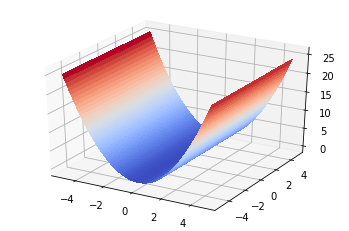

In [171]:
def function(x):
  return x[0]**2

def first_derivative(x):
  return 2*x

H = np.array([[2,0], [0,0]])
w, v = LA.eig((H))
print('Eigenvalues are: ', w)

def strict_min():
    return np.all(w > 0)

print('Eigenvalues are strictly positive: ', strict_min())

def strict_max():
    return np.all(w < 0)

print('Eigenvalues are strictly negative: ', strict_max())

# Surface to plot
x0 = np.arange(-5, 5, 0.1)
x1 = np.arange(-5, 5, 0.1)
x1_value, x2_value = np.meshgrid(x0, x1)
z_value = x1_value**2

# Surface plot 3D + contour plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x1_value, x2_value, z_value, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)

# Gradient
x0_s = symbols('x')
x0_sol = solve(first_derivative(x0_s))

x = [x0_sol[0], x1_sol[0]]

if (np.any(w == 0)):
  print('There is no gradient')
else:
  print('At point', x, 'the gradient is zero')

ax.scatter(x, function(x), zdir='z', color = 'r', s = 200)

plt.show()

As the eigenvalues are neither strictly positive nor negative, there is not gradient as one of the eigenvalues is 0.

## 2.2 A more complex two dimensional function

$
f(x_1,x_2) = x^2_1 (4- 2.1x^2_1+\frac{1}{3}x^4_1)+x_1x_2+x^2_2(-4+4x^2_2)
$

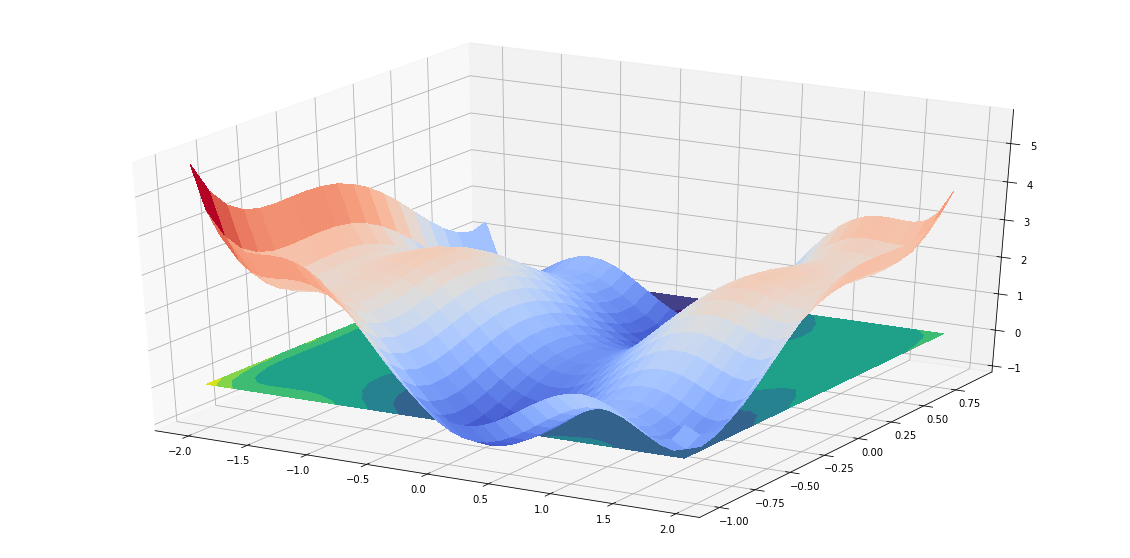

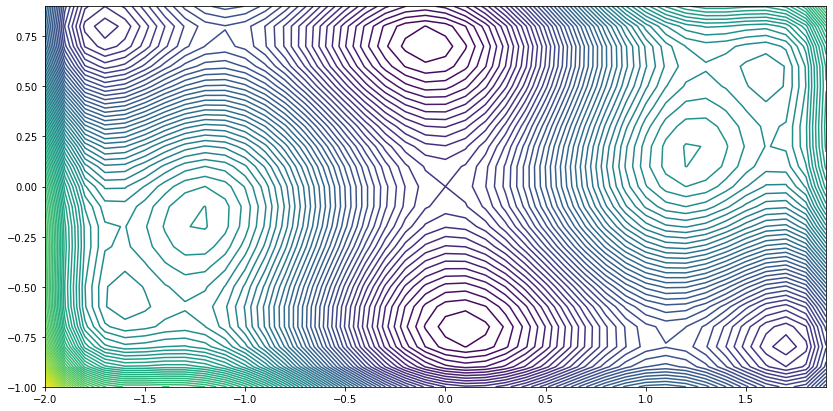

In [172]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

x0_range = np.arange(-2, 2, 0.1)
x1_range = np.arange(-1, 1, 0.1)
x0, x1 = np.meshgrid(x0_range, x1_range)

z = np.multiply(x0**2,(4-2.1* x0**2 + (1./3)*x0**4)) + np.multiply(x0,x1)+ np.multiply((x1**2),(-4+4*x1**2))

# Surface plot 3D + contour plot
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.plot_surface(x0, x1, z, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.contourf(x0, x1, z,zdir='z',offset=0)

plt.figure(figsize=(14,7))
plt.contour(x0,x1,z,100)
plt.show()

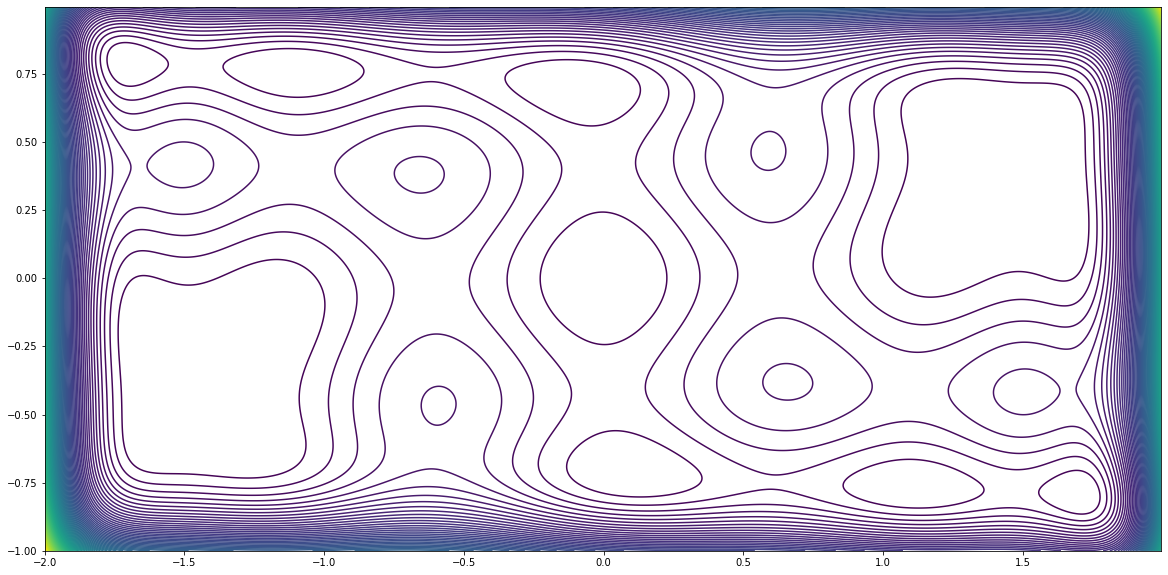

In [173]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

def grad_3(x0, x1):
  return (8*x0-8.4*x0**3+2*x0**5+x1)**2 + (x0-8*x1+16*x1**3)**2

x0_range_dev = np.arange(-2, 2, 0.005)
x1_range_dev = np.arange(-1, 1, 0.005)
x0_dev, x1_dev = np.meshgrid(x0_range_dev, x1_range_dev)

z_dev = (8*x0_dev-8.4*x0_dev**3+2*x0_dev**5+x1_dev)**2 + (x0_dev-8*x1_dev+16*x1_dev**3)**2

# Surface plot 3D + contour plot
plt.figure(figsize=(20,10))
plt.contour(x0_dev, x1_dev, z_dev, 100)
plt.show()


The obtained points are: 
[1.704999999999921, -0.7949999999999998] with value 0.00143016789599396
[1.1099999999999337, -0.7699999999999998] with value 0.0012559284739304191
[0.08999999999995545, -0.7149999999999997] with value 0.0014768714734526888
[-1.295000000000015, -0.6049999999999996] with value 4.540503633256789e-05
[-1.6050000000000084, -0.5699999999999996] with value 0.0004156534940928455
[-1.6400000000000077, -0.22999999999999932] with value 0.00067458253056989
[-1.2300000000000164, -0.15999999999999925] with value 0.00024181811612573363
[-4.263256414560601e-14, 8.881784197001252e-16] with value 1.181910851247381e-25
[1.2299999999999311, 0.16000000000000103] with value 0.0002418181161218803
[1.6399999999999224, 0.2300000000000011] with value 0.000674582530516444
[1.6049999999999232, 0.5700000000000014] with value 0.00041565349412206665
[1.2949999999999298, 0.6050000000000013] with value 4.5405036339608944e-05
[-0.09000000000004071, 0.7150000000000016] with value 0.001476871473

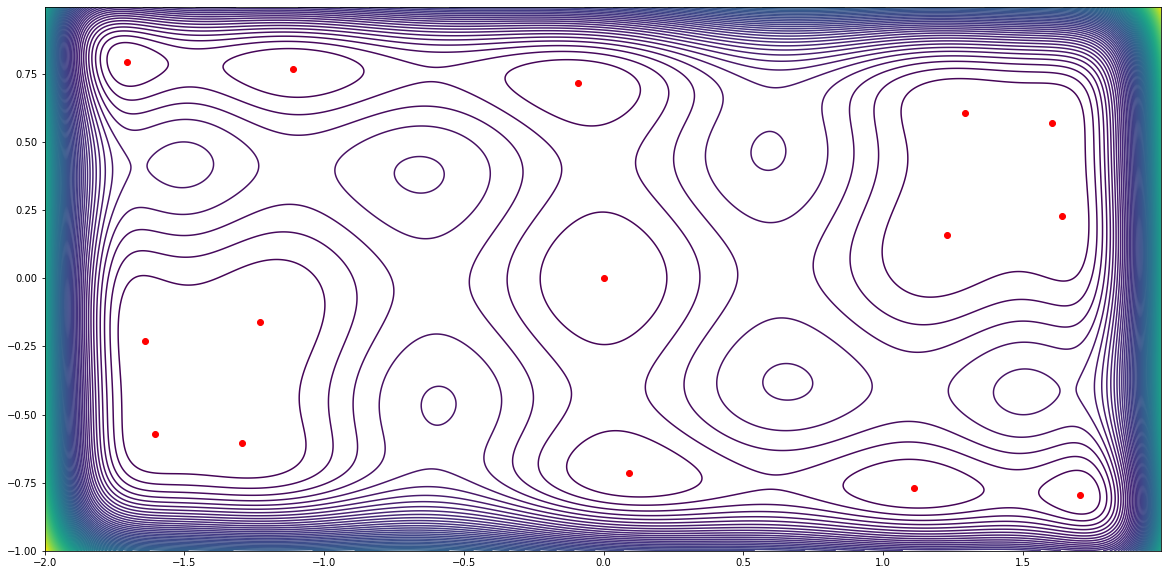

In [174]:
def grad_3(x0, x1):
  return (8*x0-8.4*x0**3+2*x0**5+x1)**2 + (x0-8*x1+16*x1**3)**2

x0_range_dev = np.arange(-2, 2, 0.005)
x1_range_dev = np.arange(-1, 1, 0.005)
x0_dev, x1_dev = np.meshgrid(x0_range_dev, x1_range_dev)

z = (8*x0_dev-8.4*x0_dev**3+2*x0_dev**5+x1_dev)**2 + (x0_dev-8*x1_dev+16*x1_dev**3)**2

pos = []
point = []
print('The obtained points are: ')
for i in range (1, z.shape[0]-1):
  for j in range (1, z.shape[1]-1):
    if z[i][j] < z[i-1][j-1] and z[i][j] < z[i-1][j] and z[i][j] < z[i-1][j+1] and z[i][j] < z[i][j-1] and z[i][j] < z[i][j+1] and z[i][j] < z[i+1][j-1] and z[i][j] < z[i+1][j] and z[i][j] < z[i+1][j+1]:
      pos.append([i, j])
      point.append([x0_dev[i][j], x1_dev[i][j]])
      print([x0_dev[i][j], x1_dev[i][j]] , 'with value' , z[i][j])

# Surface plot 3D + contour plot
plt.figure(figsize=(20,10))
plt.contour(x0_dev, x1_dev, z, 100)

for p in pos:
    plt.plot(x0_dev[p[0],p[1]], x1_dev[p[0],p[1]],'ro')

plt.show()


In [175]:
z = (8*x0_dev-8.4*x0_dev**3+2*x0_dev**5+x1_dev)**2 + (x0_dev-8*x1_dev+16*x1_dev**3)**2

def hessian_2(x):
  Hxx=8-25.2*x[0]**2+10*x[0]**4
  Hxy=1
  Hyx=1
  Hyy=-8+48*x[1]**2
  return np.array([[Hxx, Hxy],[Hyx,Hyy]])

for p in point:
  eig = np.linalg.eigvals(hessian_2(p))
  print(eig, end=' ')
  if eig[0]>0 and eig[1]>0:
    print('is minimum')
  elif not (eig[0]>0 or eig[1]>0):
    print('is maximum')
  else:
    print('is saddle')

[18.95522803 22.63288548] is minimum
[-7.90347351 20.49445761] is saddle
[ 7.683608  16.6517281] is minimum
[-6.20031498  9.63261349] is saddle
[9.88074954 7.15766846] is minimum
[12.61687844 -5.51611684] is saddle
[-8.03050482 -5.97711108] is maximum
[ 8.06225775 -8.06225775] is saddle
[-8.03050482 -5.97711108] is maximum
[12.61687844 -5.51611684] is saddle
[9.88074954 7.15766846] is minimum
[-6.20031498  9.63261349] is saddle
[ 7.683608  16.6517281] is minimum
[-7.90347351 20.49445761] is saddle
[18.95522803 22.63288548] is minimum


Hessian matrix can give us the information of the point where it's a minimum, maximum or saddle.